## *01. Análisis exploratorio de los datos*

* El análisis exploratorio de datos es una técnica utilizada en la estadística y en la ciencia de datos que se utiliza para examinar, resumir y visualizar las características clave de un conjunto de datos. Su objetivo es descubrir patrones, relaciones, tendencias y anomalías en los datos de una manera visual e intuitiva.

* El análisis exploratorio de datos se realiza mediante la aplicación de diversas técnicas estadísticas y gráficas, como histogramas, diagramas de dispersión, diagramas de caja, diagramas de barras, mapas de calor, entre otros. Estas técnicas se utilizan para resumir los datos y visualizar las relaciones entre las diferentes variables en el conjunto de datos.

* El análisis exploratorio de datos puede ayudar a los analistas de datos a comprender mejor la estructura de los datos, identificar patrones y anomalías en los datos, y descubrir relaciones entre las variables. Además, puede ayudar a los analistas a detectar y corregir errores y valores atípicos en los datos.

In [1]:
# Core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import empiricaldist
import warnings
from scipy import stats

# Display
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
sns.set_theme(context='notebook', style=plt.style.use('dark_background'))
warnings.simplefilter('ignore')

In [2]:
# Lectura de los datos
data = pd.read_parquet('../datasets/train_preprocesado.parquet')
data.head()

,id,fraude,valor,hora_aux,dist_max_nal,canal1,fecha,cod_pais,canal,diasem,diames,fecha_vin,oficina_vin,sexo,segmento,edad,ingresos,egresos,nropaises,nrociudades,dist_mean_nal,dist_hoy,dist_sum_nal
0,9000000001,1,0.00,13,659.13,atm_int,1970-01-01,us,atm_int,5,1,1970-01-01,392.00,m,personal plus,29.00,"1,200,000.00","1,200,000.00",1,6,474.94,"4,552.41","5,224.36"
1,9000000002,1,0.00,17,594.77,atm_int,1970-01-01,us,atm_int,5,15,1970-01-01,716.00,m,personal plus,29.00,"5,643,700.00","500,000.00",1,5,289.99,"4,552.41","2,029.90"
2,9000000003,1,0.00,13,659.13,atm_int,1970-01-01,us,atm_int,5,1,1970-01-01,392.00,m,personal plus,29.00,"1,200,000.00","1,200,000.00",1,6,474.94,"4,552.41","5,224.36"
3,9000000004,1,0.00,13,659.13,atm_int,1970-01-01,us,atm_int,5,1,1970-01-01,392.00,m,personal plus,29.00,"1,200,000.00","1,200,000.00",1,6,474.94,"4,552.41","5,224.36"
4,9000000005,1,0.00,0,1.00,atm_int,1970-01-01,cr,atm_int,0,10,1970-01-01,788.00,m,personal,25.00,0.00,0.00,1,1,NaN,"1,482.35",1.00


In [3]:
# Dimensiones del dataset
print(f'Número de muestras: {data.shape[0]}')
print(f'Predictores: {data.shape[1]}\n')
data.info()

Número de muestras: 2960
Predictores: 23

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2960 entries, 0 to 2959
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             2960 non-null   int64         
 1   fraude         2960 non-null   int64         
 2   valor          2960 non-null   float64       
 3   hora_aux       2960 non-null   int64         
 4   dist_max_nal   2960 non-null   float64       
 5   canal1         2960 non-null   category      
 6   fecha          2960 non-null   datetime64[ns]
 7   cod_pais       2960 non-null   category      
 8   canal          2960 non-null   category      
 9   diasem         2960 non-null   int64         
 10  diames         2960 non-null   int64         
 11  fecha_vin      2936 non-null   datetime64[ns]
 12  oficina_vin    2936 non-null   float64       
 13  sexo           2905 non-null   category      
 14  segmento       2936 non-null  

### *Tipos de variables*
En estadística y análisis de datos, los tipos de variables se refieren a las diferentes categorías o clasificaciones que se pueden aplicar a una variable o conjunto de datos. Las variables se pueden clasificar en varios tipos principales, que incluyen:

1. **Variables continuas**: Son variables que representan valores numéricos que se pueden medir y que pueden tomar cualquier valor en un rango continuo. Por ejemplo, la altura, el peso o la edad.

2. **Variables categóricas**: Son variables que representan categorías o clases que no tienen un orden específico. Por ejemplo, el género, el color de ojos o la marca de un automóvil.

3. **Variables discretas**: Son variables que representan valores numéricos que se pueden contar. Por ejemplo, el número de hijos de una familia, el número de estudiantes en una clase.

4. **Variables temporales**: Son variables que representan medidas o valores que varían en el tiempo. Estas variables son comunes en muchas áreas, como la economía, las finanzas, la meteorología, la ingeniería, entre otras.

In [4]:
# Función para capturar los tipos de variables
def capture_variables(data:pd.DataFrame) -> tuple:
    
    """
    Function to capture the types of Dataframe variables

    Args:
        dataframe: DataFrame
    
    Return:
        variables: tuple
    
    The order to unpack variables:
    1. continuous
    2. categoricals
    3. discretes
    4. temporaries
    """

    numericals = list(data.select_dtypes(include = [np.int64, np.int32, np.float64, np.float32]).columns)
    categoricals = list(data.select_dtypes(include = ['category', 'object', 'bool']).columns)
    temporaries = list(data.select_dtypes(include = ['datetime', 'timedelta']).columns)
    discretes = [col for col in data[numericals] if len(data[numericals][col].unique()) <= 16]
    continuous = [col for col in data[numericals] if col not in discretes]

    # Variables
    print('\t\tTipos de variables')
    print(f'Hay {len(continuous)} variables continuas')
    print(f'Hay {len(discretes)} variables discretas')
    print(f'Hay {len(temporaries)} variables temporales')
    print(f'Hay {len(categoricals)} variables categóricas')

    variables = tuple((continuous, categoricals, discretes, temporaries))
    
    # Retornamos una tupla de listas
    return variables


# Captura de variables
continuous, categoricals, discretes, temporaries = capture_variables(data=data.loc[:, (data.columns != 'fraude') & (data.columns != 'id')])

		Tipos de variables
Hay 12 variables continuas
Hay 2 variables discretas
Hay 2 variables temporales
Hay 5 variables categóricas


### *Valores faltantes*

* Los valores faltantes (también conocidos como valores nulos o valores perdidos) son datos que faltan o no se han registrado en un conjunto de datos. Pueden surgir por diversas razones, como errores en la recopilación de datos, problemas técnicos durante la transferencia de datos o simplemente porque los datos no estaban disponibles en el momento de la recopilación.

* Los valores faltantes pueden presentarse en cualquier tipo de datos, ya sea en una tabla de datos, una base de datos o un archivo de texto. Estos valores pueden ser representados de diferentes maneras, dependiendo del formato de datos utilizado. Por ejemplo, en una tabla de datos, se puede representar con una celda vacía, con un signo de interrogación o con un valor predeterminado como "NA" o "NaN" en algunos lenguajes de programación.

* Los valores faltantes pueden tener un impacto significativo en el análisis de datos, ya que pueden alterar los resultados de los análisis y los modelos de aprendizaje automático. Por lo tanto, es importante identificar y manejar los valores faltantes antes de realizar cualquier tipo de análisis de datos. Esto se puede hacer mediante técnicas de imputación, como la imputación de media o mediana, la imputación basada en modelos o la eliminación de las filas o columnas con valores faltantes.

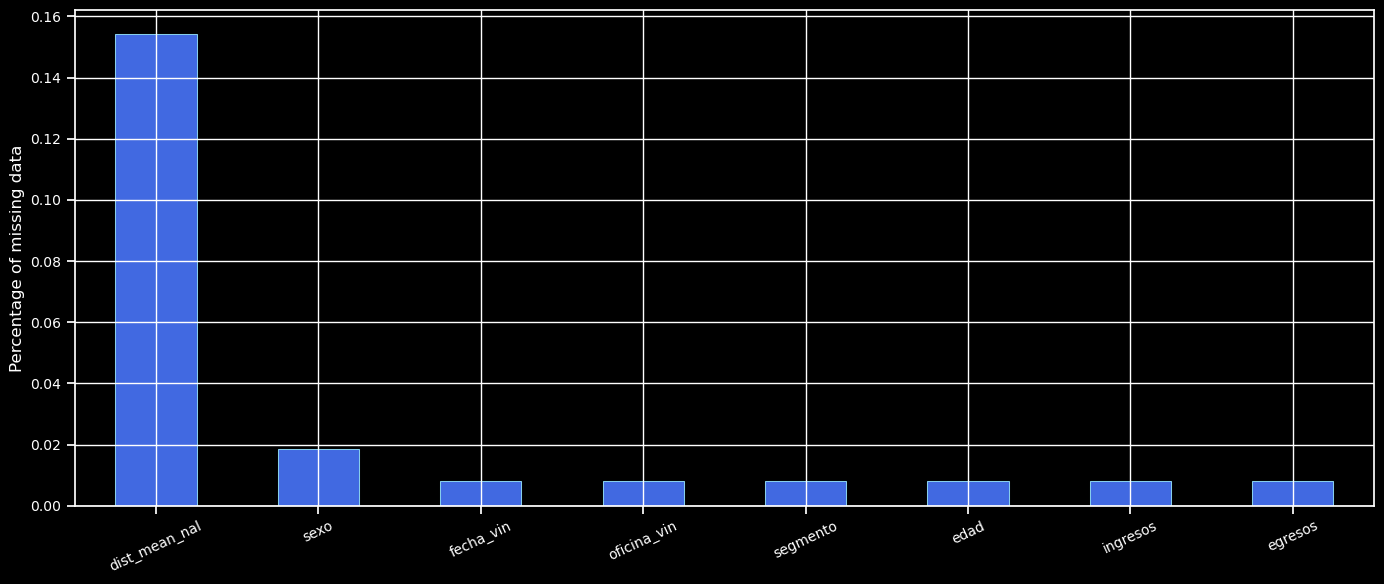

In [5]:
# Función para graficar los datos con valores nulos
def plotting_nan_values(data:pd.DataFrame) -> any:

    """
    Function to plot nan values

    Args:
        data: DataFrame
    
    Return:
        Dataviz
    """
    
    vars_with_nan = [var for var in data.columns if data[var].isnull().sum() > 0]
    
    # Plotting
    plt.figure(figsize=(14, 6))
    data[vars_with_nan].isnull().mean().sort_values(ascending=False).plot.bar(color='royalblue', edgecolor='skyblue', lw=0.75)
    plt.ylabel('Percentage of missing data')
    plt.xticks(fontsize=10, rotation=25)
    plt.yticks(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    

# Graficando los valores faltantes
plotting_nan_values(data)

### *Estadísticos descriptivos*
Los estadísticos descriptivos son un conjunto de medidas numéricas que se utilizan para resumir y describir características clave de un conjunto de datos. Estas medidas proporcionan información importante sobre la distribución, la tendencia central, la variabilidad y la forma de los datos.

Algunos de los estadísticos descriptivos más comunes incluyen:

* Media: es el promedio aritmético de los valores en un conjunto de datos.
* Mediana: es el valor central en un conjunto de datos ordenado.
* Moda: es el valor más común en un conjunto de datos.
* Desviación estándar: es una medida de la variabilidad de los valores en un conjunto de datos.
* Rango: es la diferencia entre el valor máximo y mínimo en un conjunto de datos.
* Percentiles: son valores que dividen un conjunto de datos en partes iguales.

In [6]:
# Resumen estadístico de variables continuas
data[continuous].describe().T

,count,mean,std,min,25%,50%,75%,max
valor,"2,960.00","503,728.80","986,723.59",0.00,"89,490.62","243,591.25","505,834.42","20,014,064.66"
hora_aux,"2,960.00",14.96,6.35,0.00,12.00,16.00,20.00,23.00
dist_max_nal,"2,960.00",314.37,294.88,1.00,23.91,243.62,594.77,"1,310.46"
diames,"2,960.00",13.50,9.13,1.00,4.00,15.00,21.00,31.00
oficina_vin,"2,936.00",416.01,290.24,1.00,167.75,360.00,659.00,967.00
edad,"2,936.00",40.02,12.99,0.00,31.00,38.00,47.00,133.00
ingresos,"2,936.00","14,508,765.28","56,419,358.54",0.00,"2,500,000.00","5,800,000.00","12,819,167.00","1,940,070,000.00"
egresos,"2,936.00","8,519,092.38","61,843,432.24",0.00,"500,000.00","1,850,000.00","4,500,000.00","1,600,000,000.00"
nrociudades,"2,960.00",3.94,2.75,1.00,2.00,3.00,5.00,20.00
dist_mean_nal,"2,503.00",196.55,191.96,4.48,60.80,127.82,269.75,"1,217.57"


In [7]:
# Resumen estadístico de variables categóricas
data[categoricals].describe().T

,count,unique,top,freq
canal1,2960,2,pos,2326
cod_pais,2960,29,us,2546
canal,2960,3,mci,1199
sexo,2905,2,m,1469
segmento,2936,6,personal plus,1523


In [8]:
# Resumen estadístico de variables discretas
data[discretes] = data[discretes].astype('category')
data[discretes].describe().T

,count,unique,top,freq
diasem,2960,7,5,641
nropaises,2960,8,1,1543


In [9]:
# Resumen estadístico de variables temporales
data[temporaries].describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
fecha,2960,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01
fecha_vin,2936,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01


### *Distribución de clases*
* La distribución de clases se refiere a la proporción de cada clase o categoría en un conjunto de datos. En el contexto del aprendizaje automático, las clases suelen ser las etiquetas o categorías que se intentan predecir a partir de un conjunto de características o variables.

* La distribución de clases es importante en el aprendizaje automático porque puede afectar el rendimiento del modelo. En particular, si hay una clase que es mucho más común que las demás, el modelo puede tender a predecir esa clase con más frecuencia, incluso si no es la clase correcta en un caso específico. Esto puede llevar a una precisión reducida en la predicción de las clases menos comunes.

* Por lo tanto, es importante conocer la distribución de clases en un conjunto de datos antes de entrenar un modelo y ajustar los parámetros del modelo para asegurarse de que las clases menos comunes también se predicen con precisión. Además, si la distribución de clases es desigual, se pueden utilizar técnicas de muestreo para equilibrar las clases y mejorar el rendimiento del modelo.

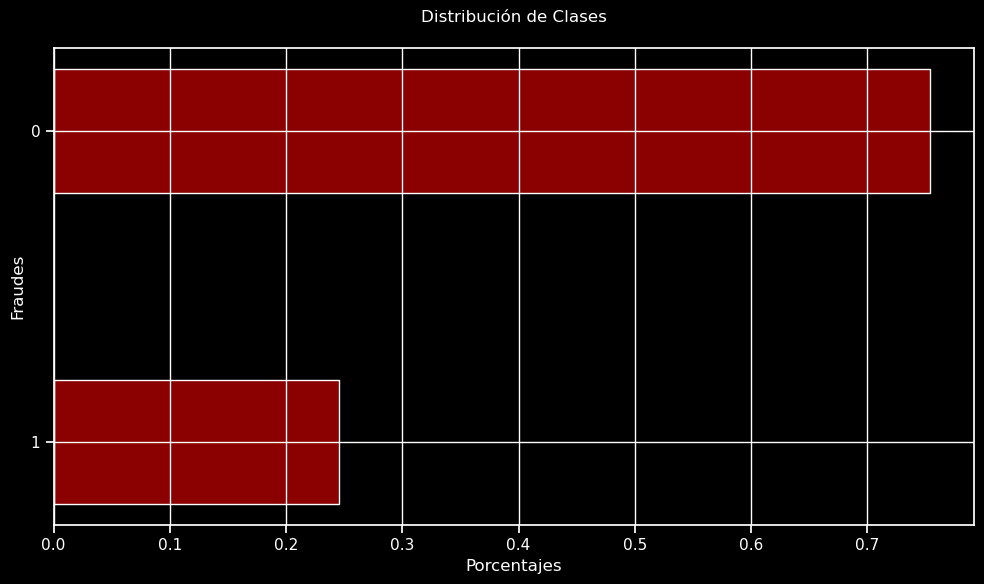

In [10]:
# Distribución de clases
distribucion = data['fraude'].value_counts(normalize=True)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear gráfico de barras horizontales con la paleta de colores personalizada
ax.barh(distribucion.index, distribucion.values, align='center', color='darkred', 
        edgecolor='white', height=0.4)

# Definir título y etiquetas de los ejes
ax.set_title('Distribución de Clases\n')
ax.set_xlabel('Porcentajes')
ax.set_ylabel('Fraudes')

# Ajustar la posición de las etiquetas de las barras
ax.invert_yaxis()  
ax.set_yticks(distribucion.index)
ax.set_yticklabels(distribucion.index)

# Mostrar el gráfico
plt.grid()
plt.tight_layout()

### **Correlaciones**
Las correlaciones son medidas que indican la fuerza y la dirección de la relación entre dos variables. La correlación puede ser positiva, lo que significa que las variables se mueven en la misma dirección, o negativa, lo que significa que se mueven en direcciones opuestas. Una correlación de cero indica que no hay relación entre las variables.

#### *Matriz de correlaciones*
* La matriz de correlación es útil para entender cómo se relacionan las variables en un conjunto de datos. Puede ayudar a identificar patrones o relaciones interesantes entre las variables y puede ser una herramienta importante para la selección de características. Por ejemplo, si dos variables están altamente correlacionadas, es posible que una de ellas no aporte información adicional al modelo y se pueda eliminar para simplificar el conjunto de datos y mejorar el rendimiento del modelo.

* La matriz de correlación también puede ser utilizada para detectar multicolinealidad, que es cuando dos o más variables están altamente correlacionadas entre sí. La multicolinealidad puede causar problemas en algunos modelos de aprendizaje automático, por lo que es importante detectarla y tratarla adecuadamente.

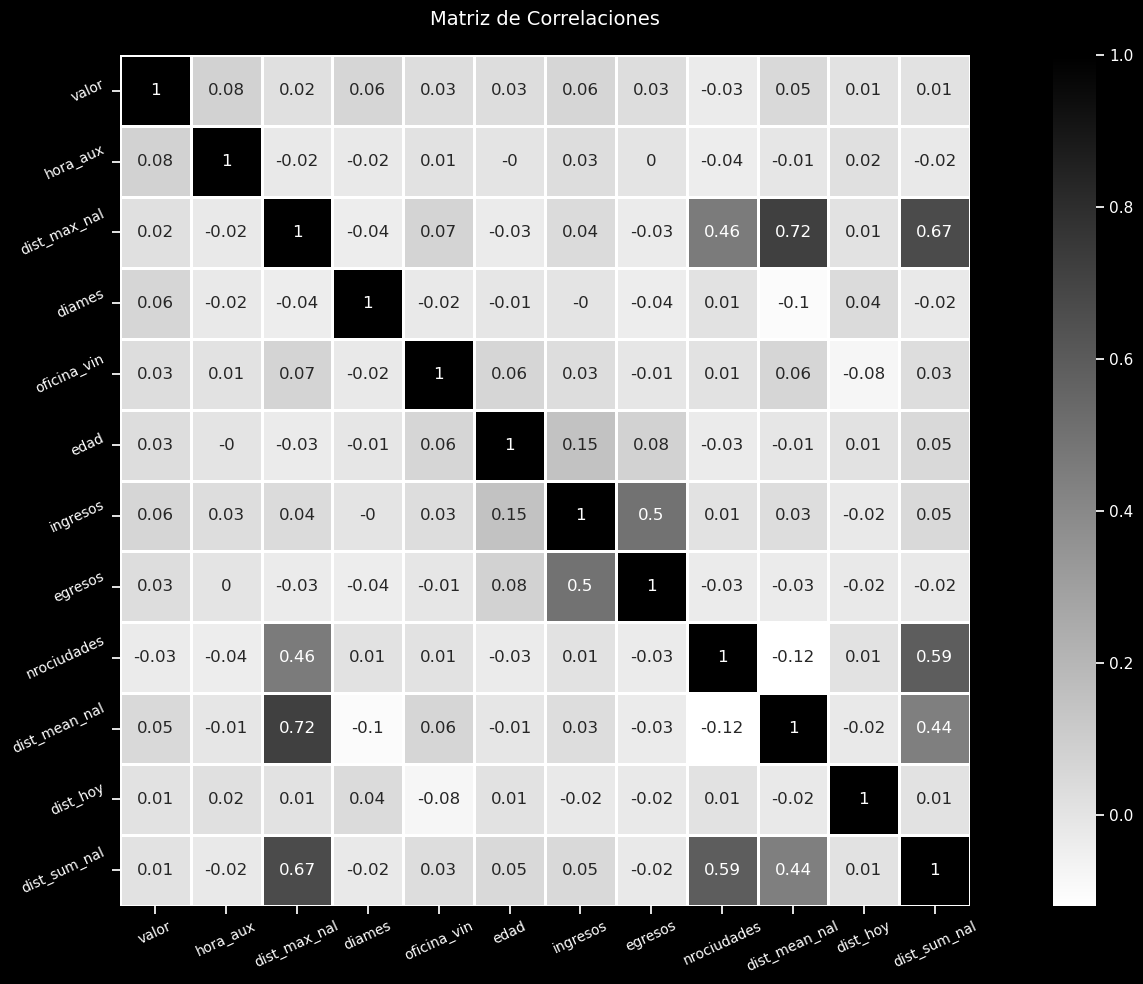

In [11]:
# Correlación entre predictores
%matplotlib inline
correlations = data[continuous].corr(method='pearson', numeric_only=True).round(2)
plt.figure(figsize=(17, 10))
sns.heatmap(correlations, vmax=1, annot=True, cmap='gist_yarg', linewidths=1, square=True)
plt.title('Matriz de Correlaciones\n', fontsize=14)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10, rotation=25)
plt.tight_layout()

### **Covarianzas**
La covarianza es una medida que indica la relación entre dos variables aleatorias. Es una medida de cómo dos variables cambian juntas. Si la covarianza es positiva, significa que las variables tienden a cambiar en la misma dirección. Si es negativa, significa que cambian en direcciones opuestas. Si la covarianza es cero, significa que no hay relación entre las variables.

#### *Matriz de covarianzas*
La matriz de covarianza es útil para entender cómo se relacionan las variables en un conjunto de datos. Al igual que la matriz de correlación, puede ayudar a identificar patrones o relaciones interesantes entre las variables. Sin embargo, la covarianza no está normalizada, lo que significa que su valor absoluto puede ser difícil de interpretar. Además, las unidades de la covarianza son el producto de las unidades de las dos variables, lo que puede dificultar la comparación de covarianzas entre diferentes pares de variables.

In [12]:
# Covarianza entre los predictores
# Función para obtener una matriz de covarianza entre los predictores
def covariance_matrix(data:pd.DataFrame):
    
    """
    Function to get mapped covariance matrix

    Args:
        data: DataFrame
        map_function: function
    
    Return:
        DataFrame
    """
    
    cov_matrix = data.cov()
    
    # Crear una matriz de ceros con el mismo tamaño que la matriz de covarianza
    zeros_matrix = np.zeros(cov_matrix.shape)
    
    # Crear una matriz diagonal de ceros reemplazando los valores de la diagonal de la matriz con ceros
    diagonal_zeros_matrix = np.diag(zeros_matrix)
    
    # Reemplazar la diagonal de la matriz de covarianza con la matriz diagonal de ceros
    np.fill_diagonal(cov_matrix.to_numpy(), diagonal_zeros_matrix)
    
    # Función de mapeo
    def map_function(x:float) -> str:
        
        if x > 0:
            return 'Positivo'
        
        elif x < 0:
            return 'Negativo'
        
        else:
            return ''
    
    # Mapear los valores con etiquetas para saber cómo covarian los predictores
    cov_matrix = cov_matrix.applymap(map_function)
    
    return cov_matrix


# Matriz de covarianza
covariance_matrix(data[continuous])

,valor,hora_aux,dist_max_nal,diames,oficina_vin,edad,ingresos,egresos,nrociudades,dist_mean_nal,dist_hoy,dist_sum_nal
valor,,Positivo,Positivo,Positivo,Positivo,Positivo,Positivo,Positivo,Negativo,Positivo,Positivo,Positivo
hora_aux,Positivo,,Negativo,Negativo,Positivo,Negativo,Positivo,Positivo,Negativo,Negativo,Positivo,Negativo
dist_max_nal,Positivo,Negativo,,Negativo,Positivo,Negativo,Positivo,Negativo,Positivo,Positivo,Positivo,Positivo
diames,Positivo,Negativo,Negativo,,Negativo,Negativo,Negativo,Negativo,Positivo,Negativo,Positivo,Negativo
oficina_vin,Positivo,Positivo,Positivo,Negativo,,Positivo,Positivo,Negativo,Positivo,Positivo,Negativo,Positivo
edad,Positivo,Negativo,Negativo,Negativo,Positivo,,Positivo,Positivo,Negativo,Negativo,Positivo,Positivo
ingresos,Positivo,Positivo,Positivo,Negativo,Positivo,Positivo,,Positivo,Positivo,Positivo,Negativo,Positivo
egresos,Positivo,Positivo,Negativo,Negativo,Negativo,Positivo,Positivo,,Negativo,Negativo,Negativo,Negativo
nrociudades,Negativo,Negativo,Positivo,Positivo,Positivo,Negativo,Positivo,Negativo,,Negativo,Positivo,Positivo
dist_mean_nal,Positivo,Negativo,Positivo,Negativo,Positivo,Negativo,Positivo,Negativo,Negativo,,Negativo,Positivo


### *Análisis Univariado*
* El análisis univariado es un tipo de análisis de datos en el que se examina una sola variable a la vez. En otras palabras, se trata de analizar las características o propiedades de una variable de manera aislada, sin tener en cuenta ninguna relación con otras variables.

* El análisis univariado es una técnica común en estadística descriptiva y se utiliza para resumir y visualizar las características de una variable. Por ejemplo, se puede utilizar el análisis univariado para calcular medidas de tendencia central, como la media o la mediana, o para calcular medidas de dispersión, como la desviación estándar o el rango.

* El análisis univariado también se utiliza en la exploración de datos para identificar valores atípicos o valores extremos, y para detectar cualquier problema con los datos, como valores faltantes o valores incorrectos.

#### *Continuas*

* El **sesgo** se refiere a la tendencia de una distribución a desviarse hacia un lado u otro de la media. Una distribución simétrica tendrá un **sesgo** de cero, mientras que una distribución asimétrica tendrá un **sesgo** positivo o negativo. Un **sesgo** positivo indica que la cola de la distribución se extiende más hacia la derecha que hacia la izquierda, mientras que un **sesgo** negativo indica que la cola se extiende más hacia la izquierda que hacia la derecha.

* La **kurtosis**, por otro lado, mide la concentración de los datos alrededor de la media. Una distribución con una **kurtosis** alta tendrá una concentración de datos en la región central y colas más pesadas, mientras que una distribución con una **kurtosis** baja tendrá una concentración de datos más uniforme a lo largo de la distribución y colas más ligeras.

* Los **valores atípicos**, también conocidos como outliers en inglés, son valores que se alejan significativamente del resto de los datos en un conjunto de datos. En otras palabras, son valores extremos que están muy por encima o por debajo del rango típico de los demás valores en el conjunto de datos.

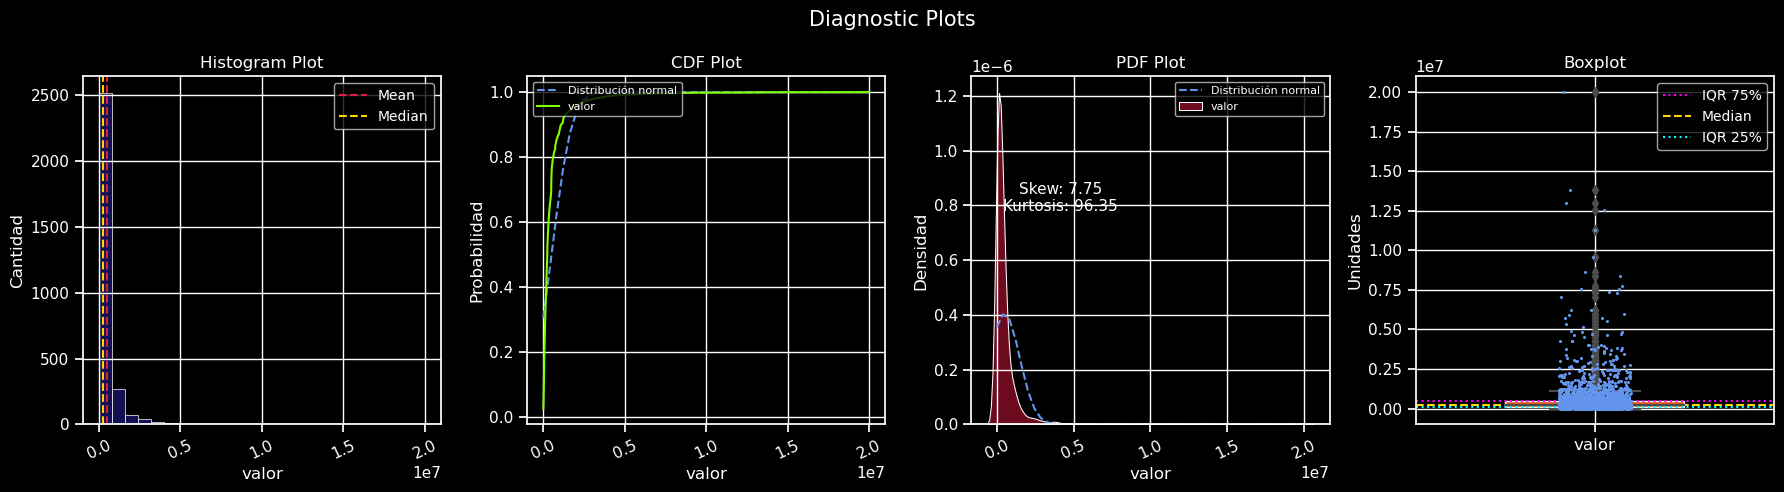

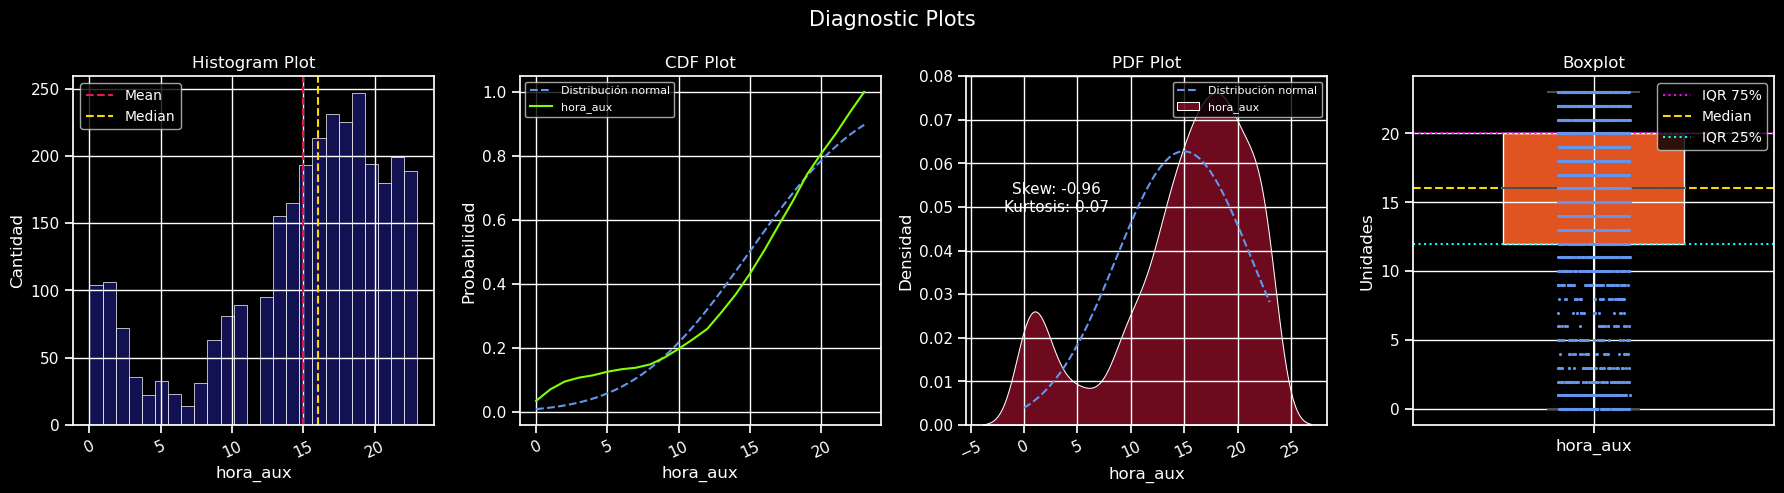

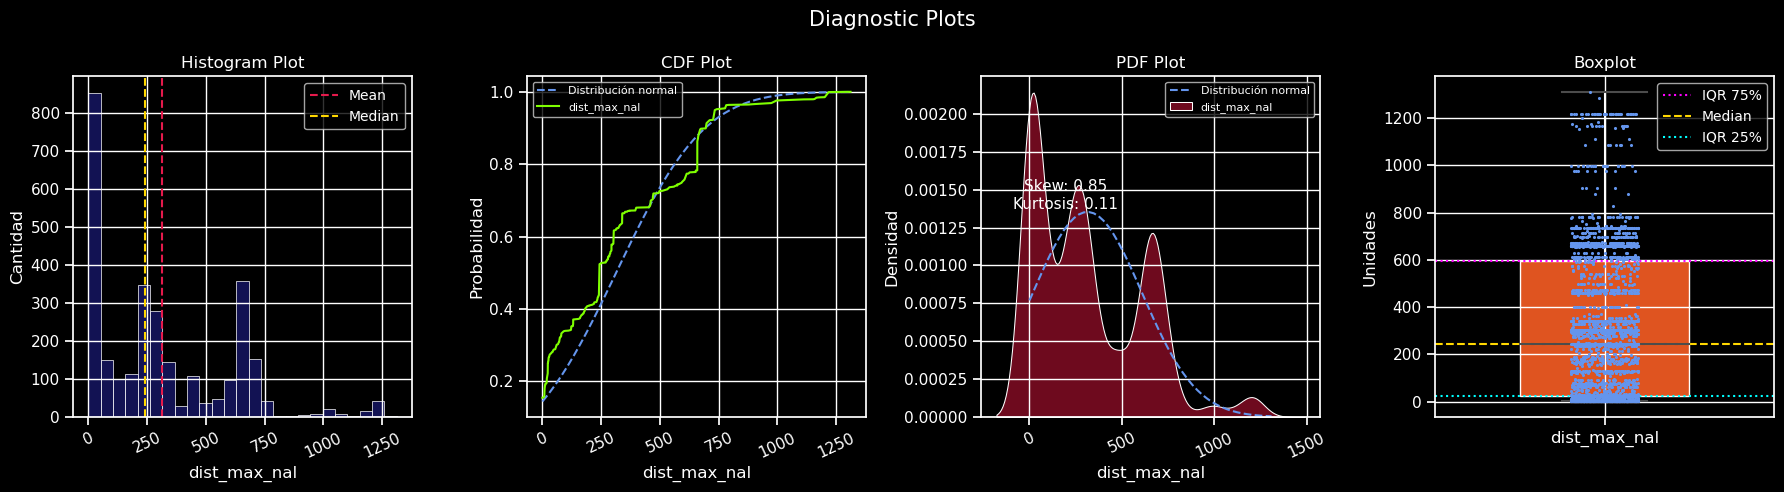

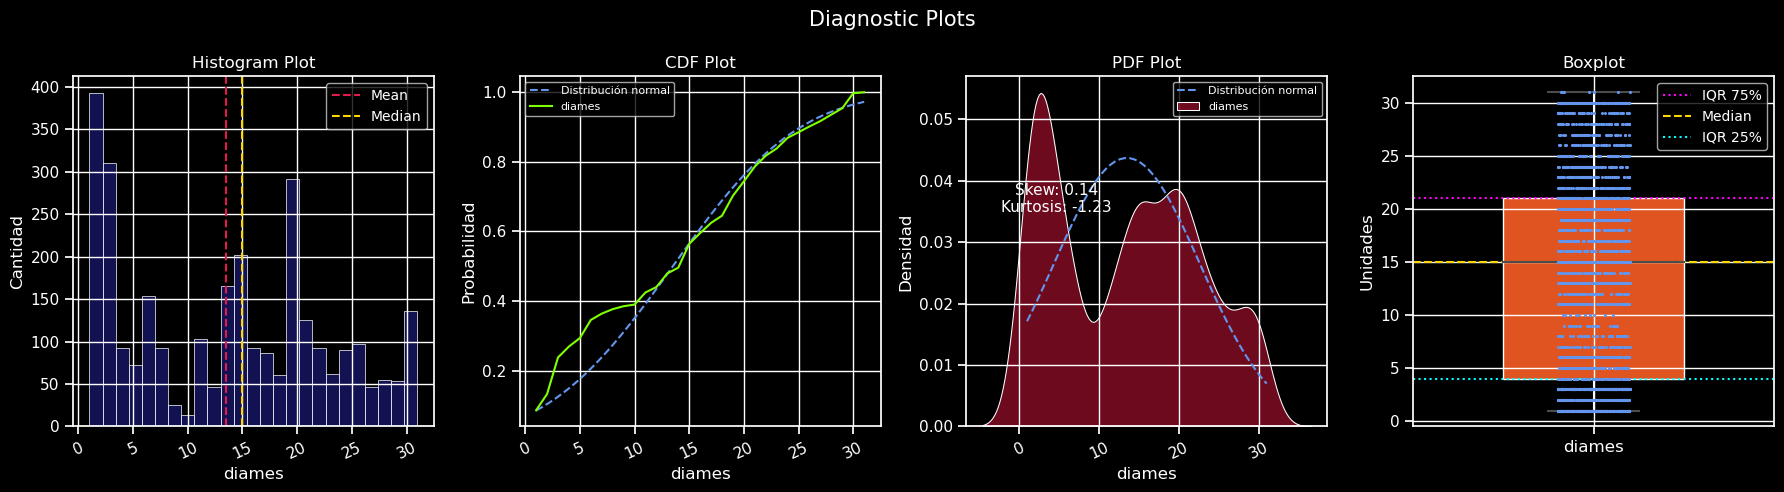

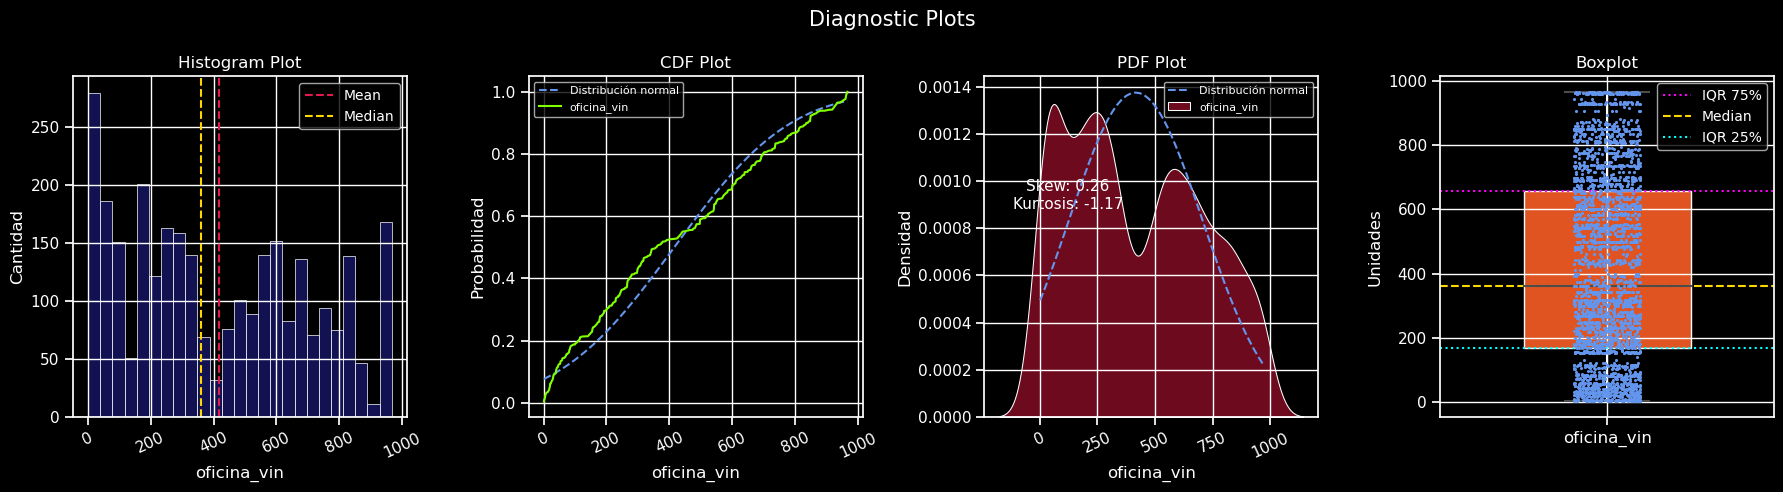

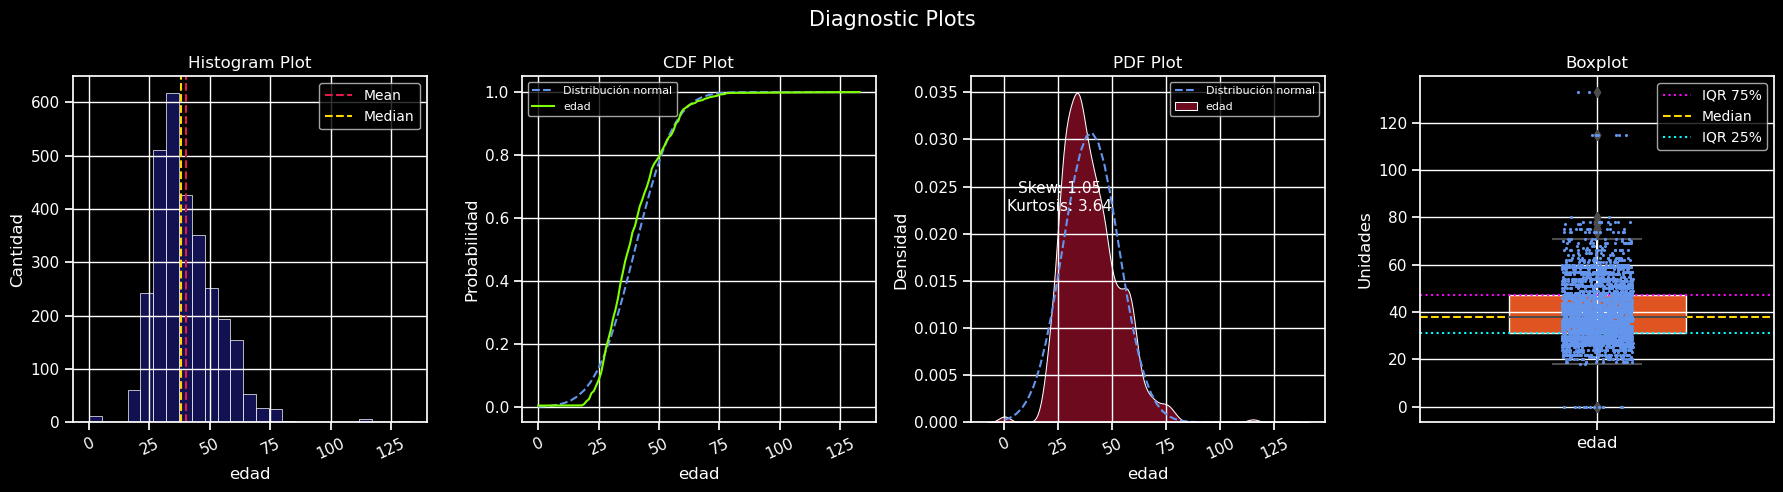

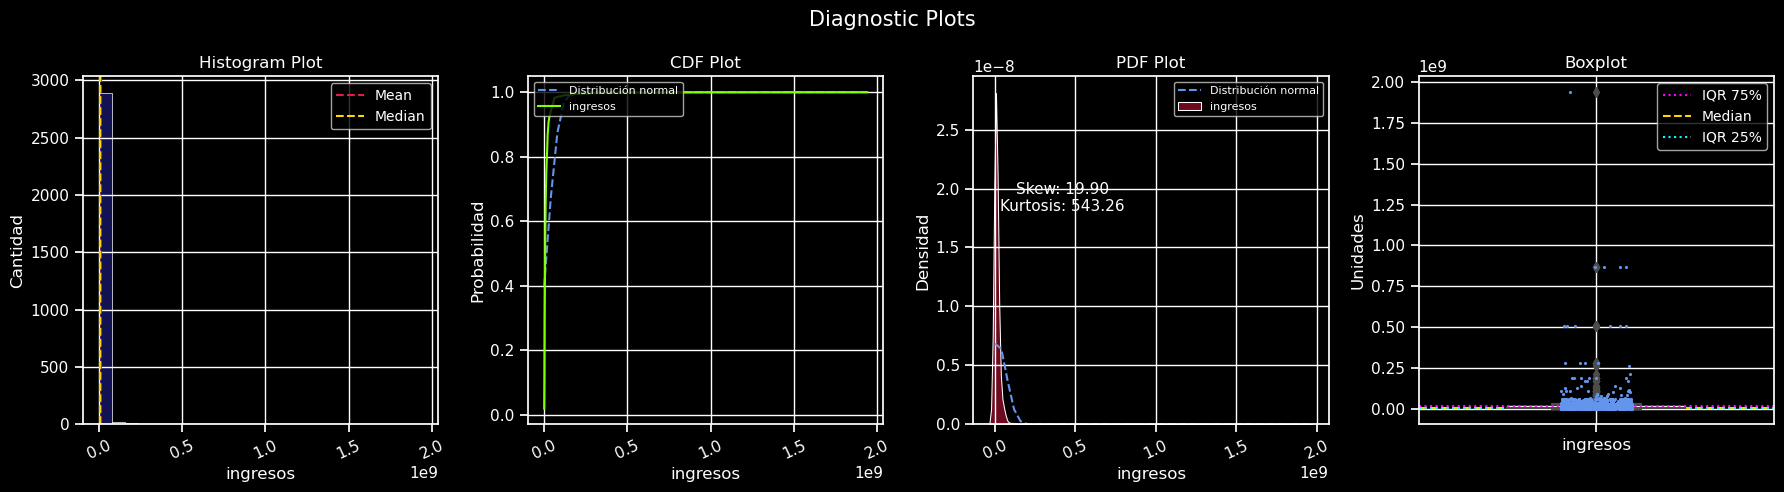

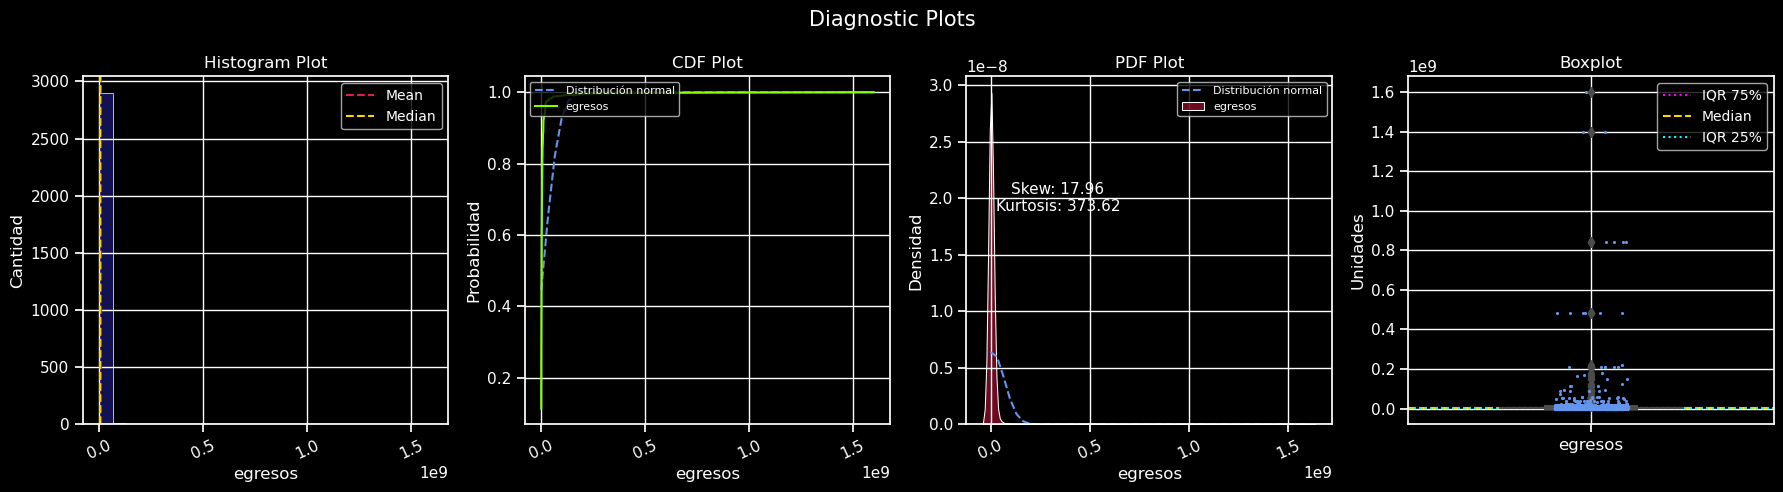

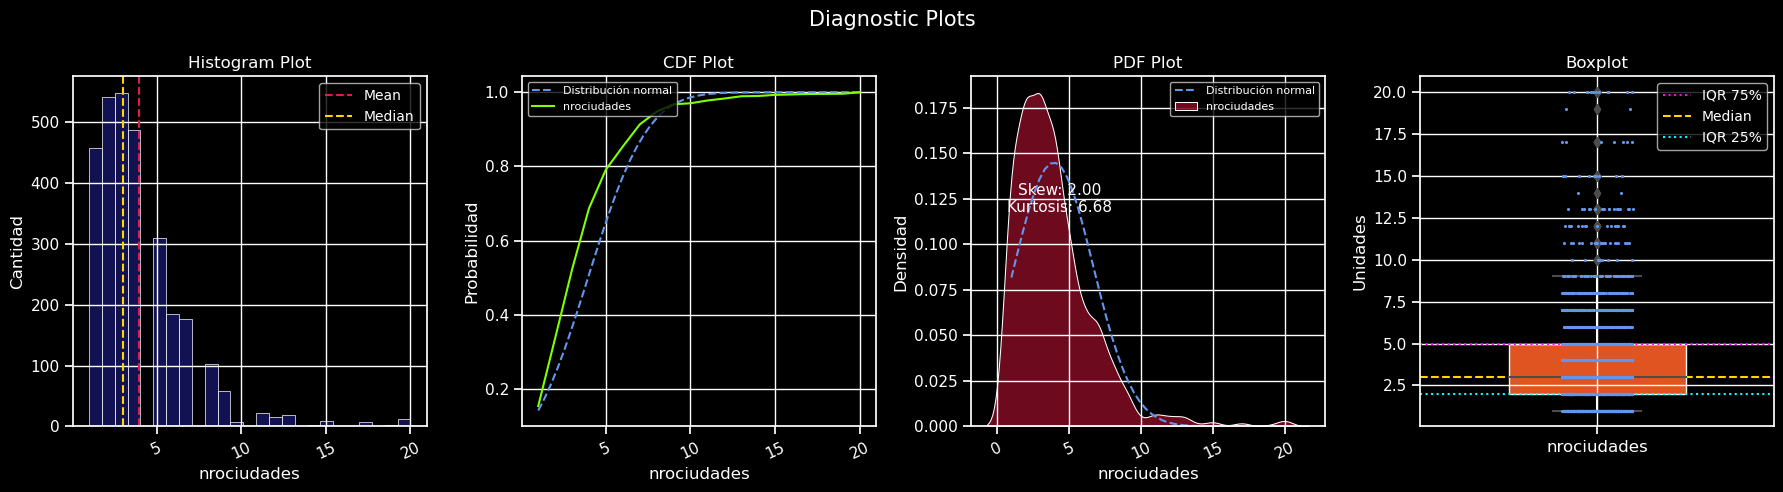

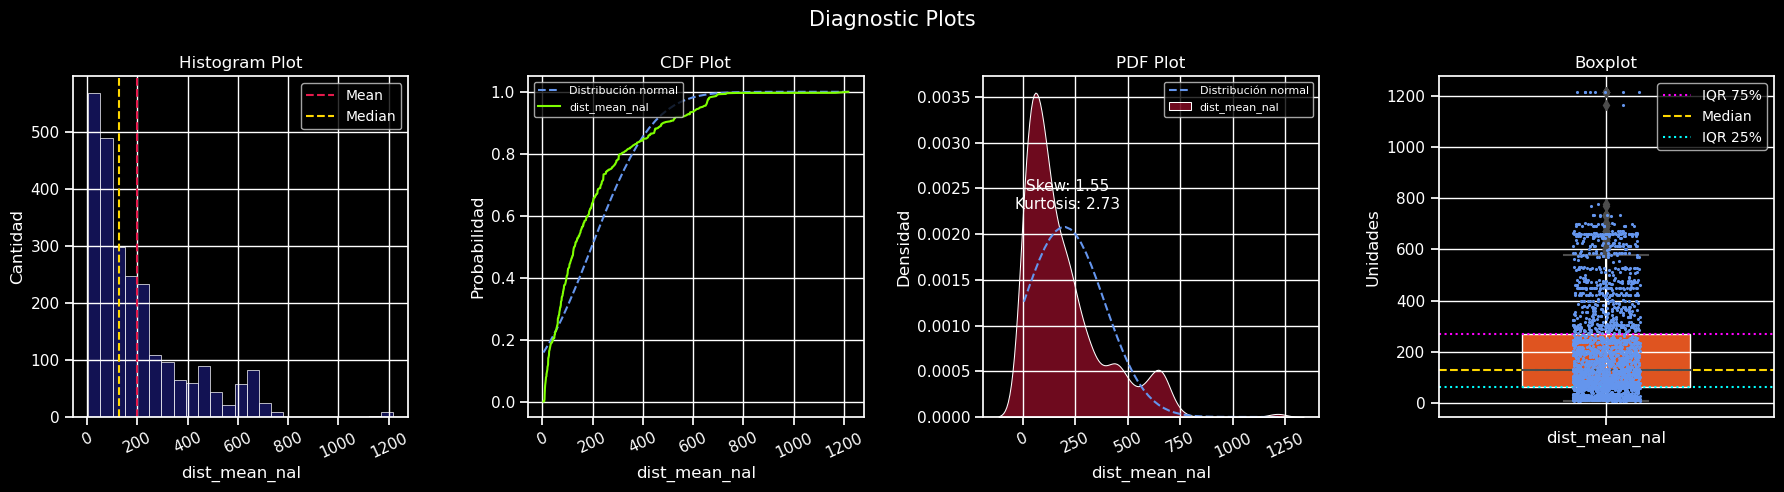

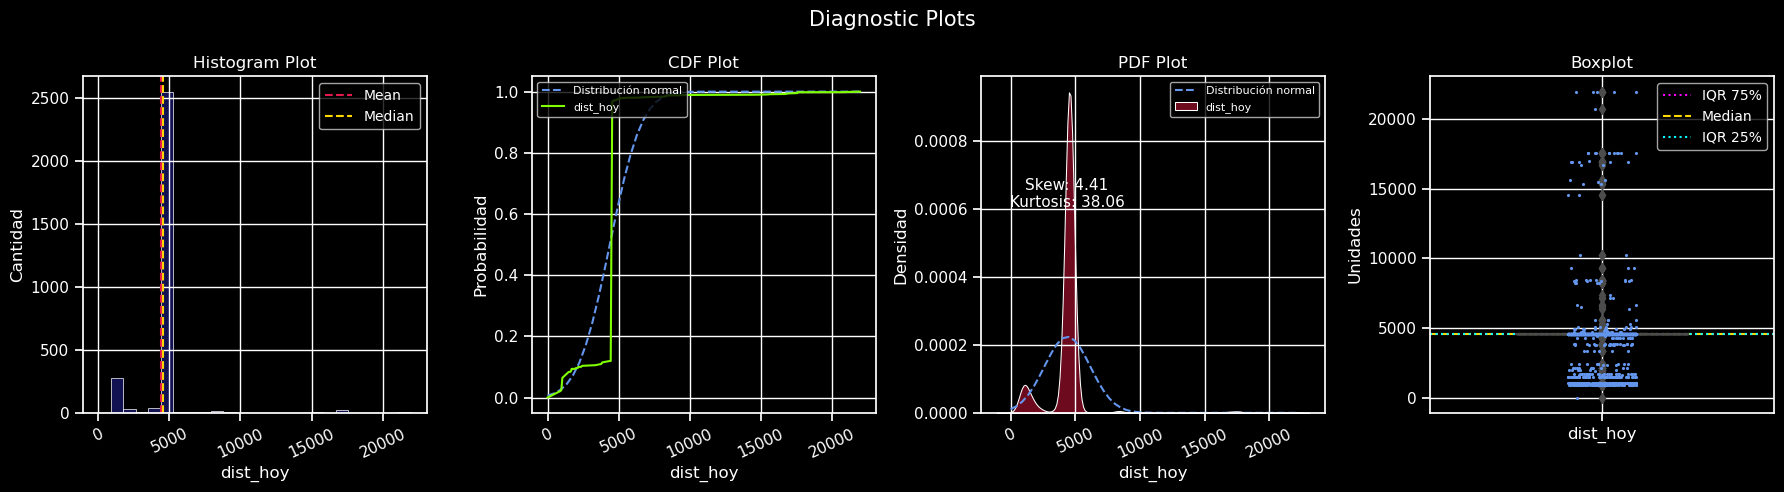

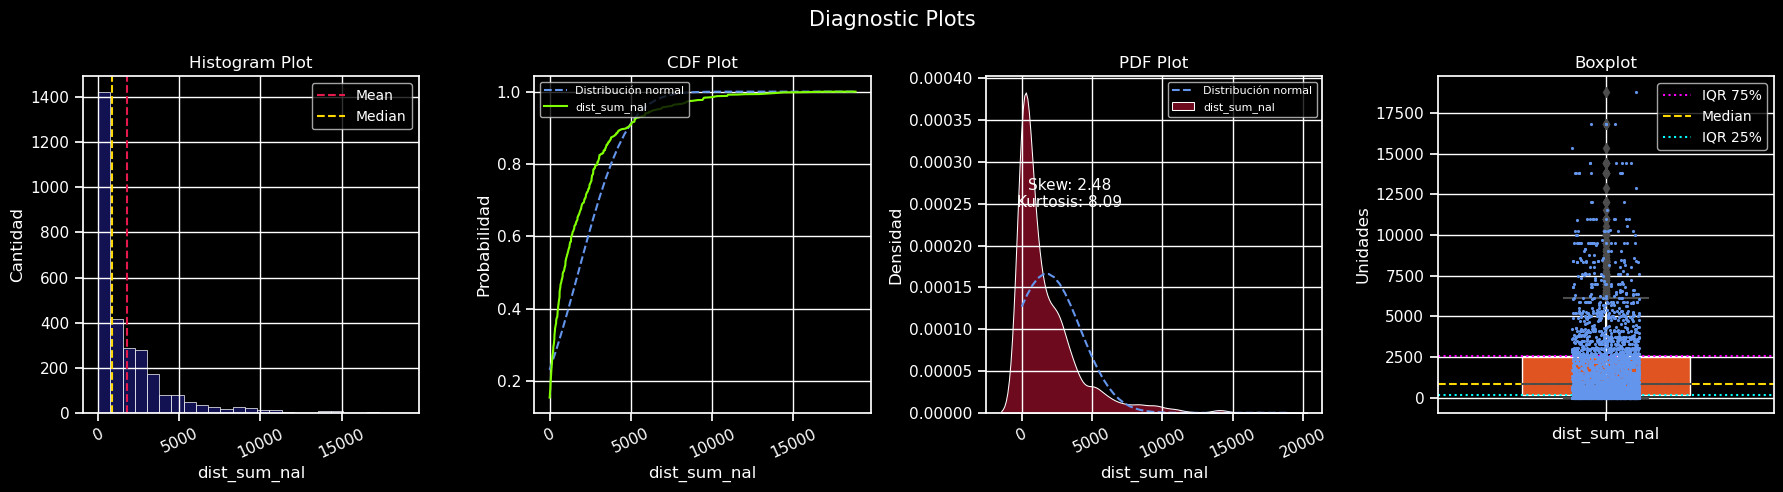

In [13]:
# Función para observar el comportamiento de variables continuas
def diagnostic_plots(data:pd.DataFrame, variables:list) -> any:

    """
    Function to get diagnostic graphics into continous predictors

    Args:
        data: DataFrame
        variables: list
    
    Return:
        Dataviz
    """
        
    for var in data[variables]:
        fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 5))
        fig.suptitle('Diagnostic Plots', fontsize=15)
        plt.rcParams.update({'figure.max_open_warning': 0}) # Evitar un warning

        # Histogram Plot
        plt.subplot(1, 4, 1)
        plt.title('Histogram Plot')
        sns.histplot(data[var], bins=25, color='midnightblue', edgecolor='white', lw=0.5)
        plt.axvline(data[var].mean(), color='#E51A4C', ls='dashed', lw=1.5, label='Mean')
        plt.axvline(data[var].median(), color='gold', ls='dashed', lw=1.5, label='Median')
        plt.ylabel('Cantidad')
        plt.xticks(rotation=25)
        plt.xlabel(var)
        plt.grid(True)
        plt.legend(fontsize=10)
        
        # CDF Plot
        plt.subplot(1, 4, 2)
        plt.title('CDF Plot')
        xs = np.linspace(data[var].min(), data[var].max())
        ys = stats.norm(data[var].mean(), data[var].std()).cdf(xs) # Distribución normal a partir de unos datos
        plt.plot(xs, ys, color='cornflowerblue', ls='dashed')
        empiricaldist.Cdf.from_seq(data[var], normalize=True).plot(color='chartreuse')
        plt.xlabel(var)
        plt.xticks(rotation=25)
        plt.ylabel('Probabilidad')
        plt.legend(['Distribución normal', var], fontsize=8, loc='upper left')
        plt.grid(True)

        # PDF Plot
        plt.subplot(1, 4, 3)
        plt.title('PDF Plot')
        kurtosis = stats.kurtosis(data[var], nan_policy='omit') # Kurtosis
        skew = stats.skew(data[var], nan_policy='omit') # Sesgo
        xs = np.linspace(data[var].min(), data[var].max())
        ys = stats.norm(data[var].mean(), data[var].std()).pdf(xs) # Distribución normal a partir de unos datos
        plt.plot(xs, ys, color='cornflowerblue', ls='dashed')
        sns.kdeplot(data=data, x=data[var], fill=True, lw=0.75, color='crimson', alpha=0.5, edgecolor='white')
        plt.text(s=f'Skew: {skew:0.2f}\nKurtosis: {kurtosis:0.2f}',
                 x=0.25, y=0.65, transform=ax3.transAxes, fontsize=11,
                 verticalalignment='center', horizontalalignment='center')
        plt.ylabel('Densidad')
        plt.xticks(rotation=25)
        plt.xlabel(var)
        plt.xlim()
        plt.legend(['Distribución normal', var], fontsize=8, loc='upper right')
        plt.grid(True)

        # Boxplot & Stripplot
        plt.subplot(1, 4, 4)
        plt.title('Boxplot')
        sns.boxplot(data=data[var], width=0.5, color='orangered', sym='*',
                    boxprops=dict(lw=1, edgecolor='white'),
                    whiskerprops=dict(color='white', lw=1.5),
                    flierprops=dict(color='red', lw=1.5))
        sns.stripplot(data=data[var], color='cornflowerblue', alpha=1, size=2.25)
        plt.axhline(data[var].quantile(0.75), color='magenta', ls='dotted', lw=1.5, label='IQR 75%')
        plt.axhline(data[var].median(), color='gold', ls='dashed', lw=1.5, label='Median')
        plt.axhline(data[var].quantile(0.25), color='cyan', ls='dotted', lw=1.5, label='IQR 25%')
        plt.xlabel(var)
        plt.tick_params(labelbottom=False)
        plt.ylabel('Unidades')
        plt.legend(fontsize=10, loc='upper right')
        plt.grid(True)        
        
        fig.tight_layout()


# Continuas
diagnostic_plots(data=data, variables=continuous)

#### *Categóricas*

* La cardinalidad se refiere al número de valores distintos que puede tomar una variable categórica o discreta. Una variable categórica es aquella que toma valores discretos y no numéricos, como por ejemplo el género (masculino o femenino) o la región geográfica (Europa, Asia, América, etc.).

* La cardinalidad de una variable categórica es importante en el proceso de preprocesamiento de datos en Machine Learning, ya que puede tener un impacto en la calidad de los modelos y en la eficiencia del procesamiento. Cuando una variable categórica tiene una alta cardinalidad (es decir, tiene muchos valores distintos), puede ser difícil de manejar y puede requerir una mayor cantidad de recursos computacionales para su procesamiento.

* Para abordar este problema, se pueden aplicar técnicas de reducción de la cardinalidad, como la agrupación de valores similares o la eliminación de valores poco frecuentes. La reducción de la cardinalidad puede ayudar a simplificar el modelo y mejorar su eficiencia sin perder información relevante. Por otro lado, una baja cardinalidad puede indicar una falta de variedad en los datos y puede ser necesario agregar más variables para mejorar la calidad del modelo.

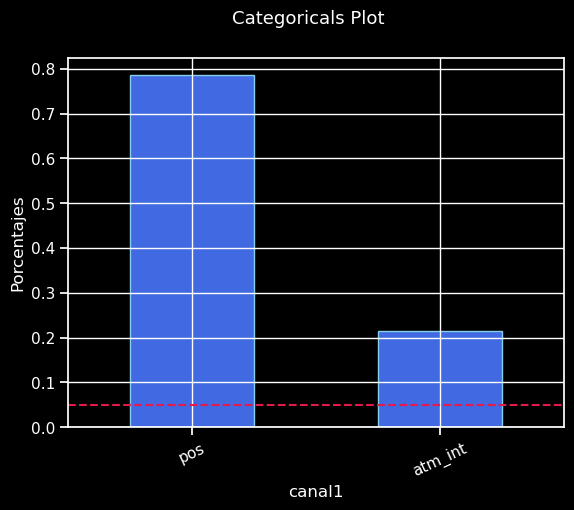

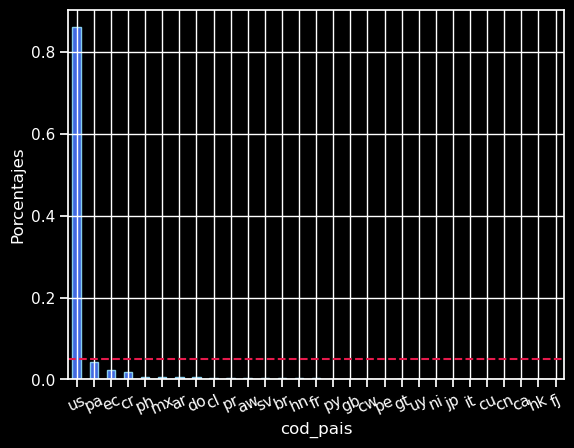

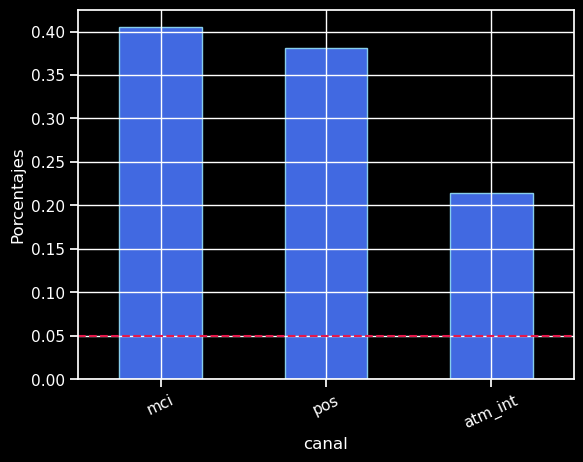

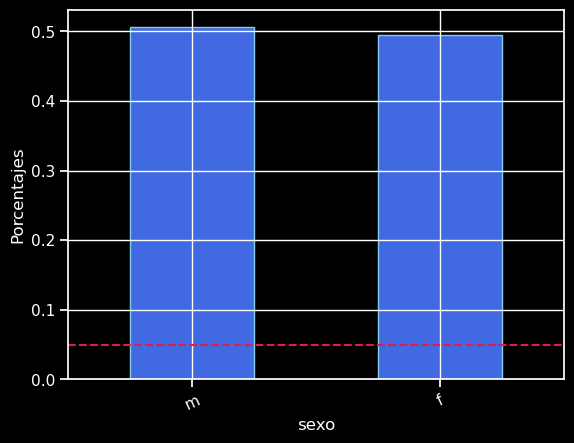

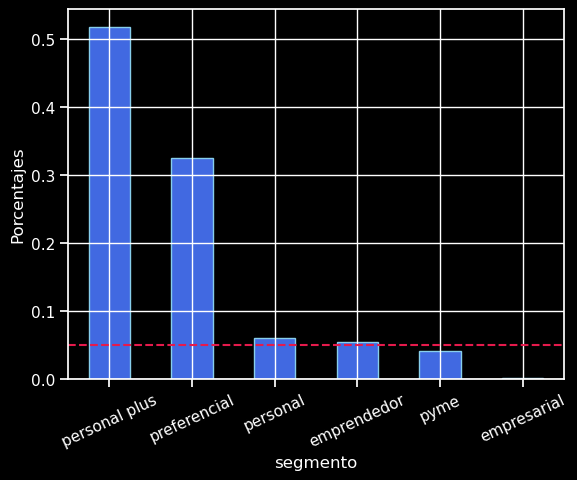

In [14]:
# Función para graficar las variables categóricas
def categoricals_plot(data:pd.DataFrame, variables:list) -> any:

    """
    Function to get distributions graphics into 
    categoricals and discretes predictors

    Args:
        data: DataFrame
        variables: list
    
    Return:
        Dataviz
    """
    
    plt.suptitle('Categoricals Plot', fontsize=13)
    for var in variables:
        temp_dataframe = pd.Series(data[var].value_counts(normalize=True))
        # Graficar con los porcentajes
        temp_dataframe.sort_values(ascending=False).plot.bar(color='royalblue', edgecolor='skyblue')

        # Añadir una línea horizontal a 5% para resaltar categorías poco comunes
        plt.axhline(y=0.05, color='#E51A4C', ls='dashed', lw=1.5)
        plt.ylabel('Porcentajes')
        plt.xlabel(var)
        plt.xticks(rotation=25)
        plt.grid(True)
        plt.show()


# Categóricas
categoricals_plot(data, categoricals)

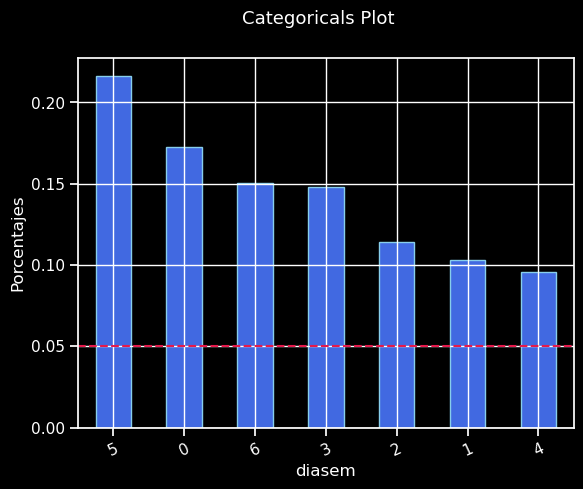

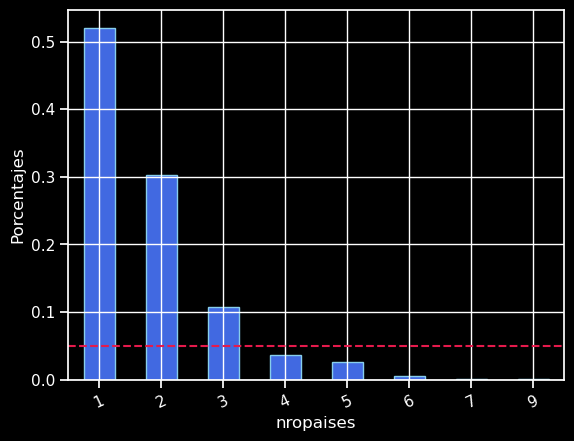

In [15]:
# Discretas
categoricals_plot(data, discretes)

### *Análisis bivariado*

* El análisis bivariado es una técnica estadística utilizada para analizar la relación entre dos variables cuantitativas o cualitativas. En otras palabras, el análisis bivariado permite evaluar la relación entre dos variables, examinando cómo los cambios en una variable afectan a la otra.

* El análisis bivariado puede ser utilizado para responder preguntas como:

    * ¿Existe una relación entre el ingreso y el nivel educativo?
    * ¿Hay alguna relación entre la edad y la frecuencia de uso de una aplicación de redes sociales?
    * ¿Hay una correlación entre el tiempo de espera en la cola de un restaurante y la satisfacción del cliente?

#### *Análisis de covarianzas*

* El análisis de covarianzas, también conocido como ANCOVA (por sus siglas en inglés), es una técnica estadística utilizada para analizar la relación entre una variable independiente categórica y una variable dependiente continua, mientras se controlan los efectos de una o más variables de covarianza (también llamadas variables de control o variables confusoras).

* La covarianza es una medida estadística que indica cómo dos variables se relacionan entre sí. En el análisis de covarianzas, la covarianza se utiliza para evaluar la relación entre la variable independiente categórica y la variable dependiente continua, mientras se controla el efecto de las variables de covarianza.

* El análisis de covarianzas es utilizado en diversas áreas, incluyendo la psicología, la medicina, la educación y las ciencias sociales. Es una herramienta importante para entender la relación entre variables y puede ayudar a informar la toma de decisiones en diversas situaciones.

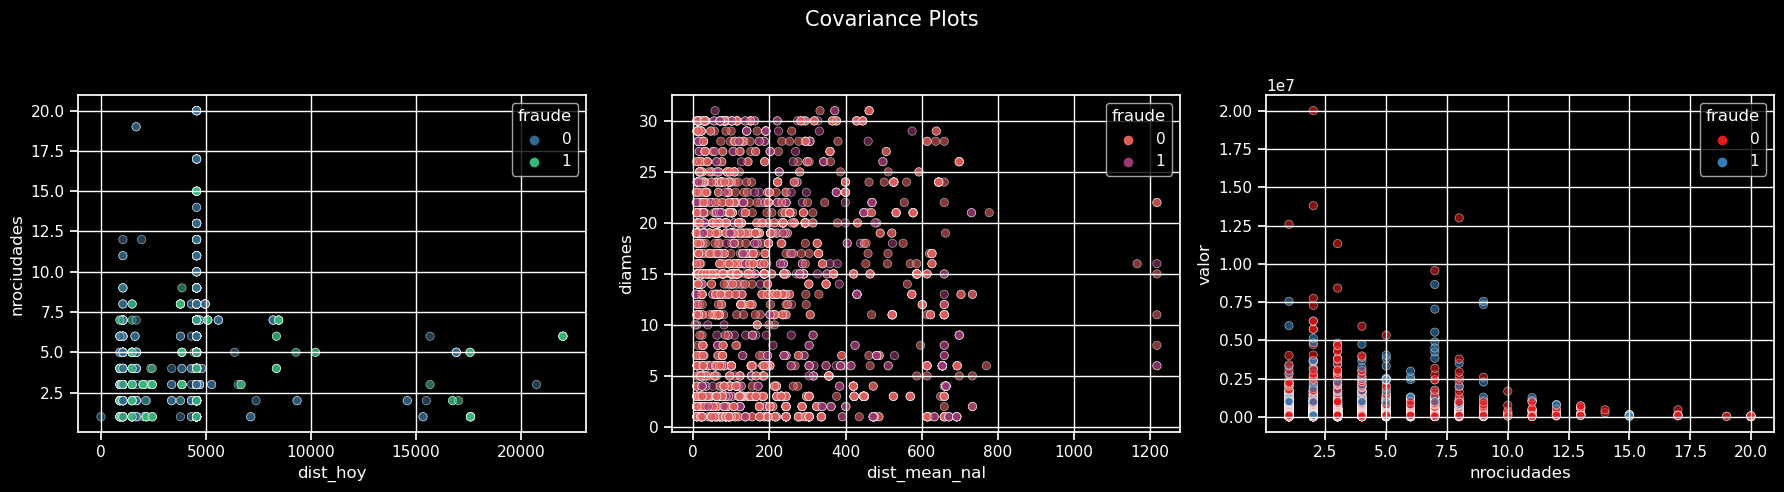

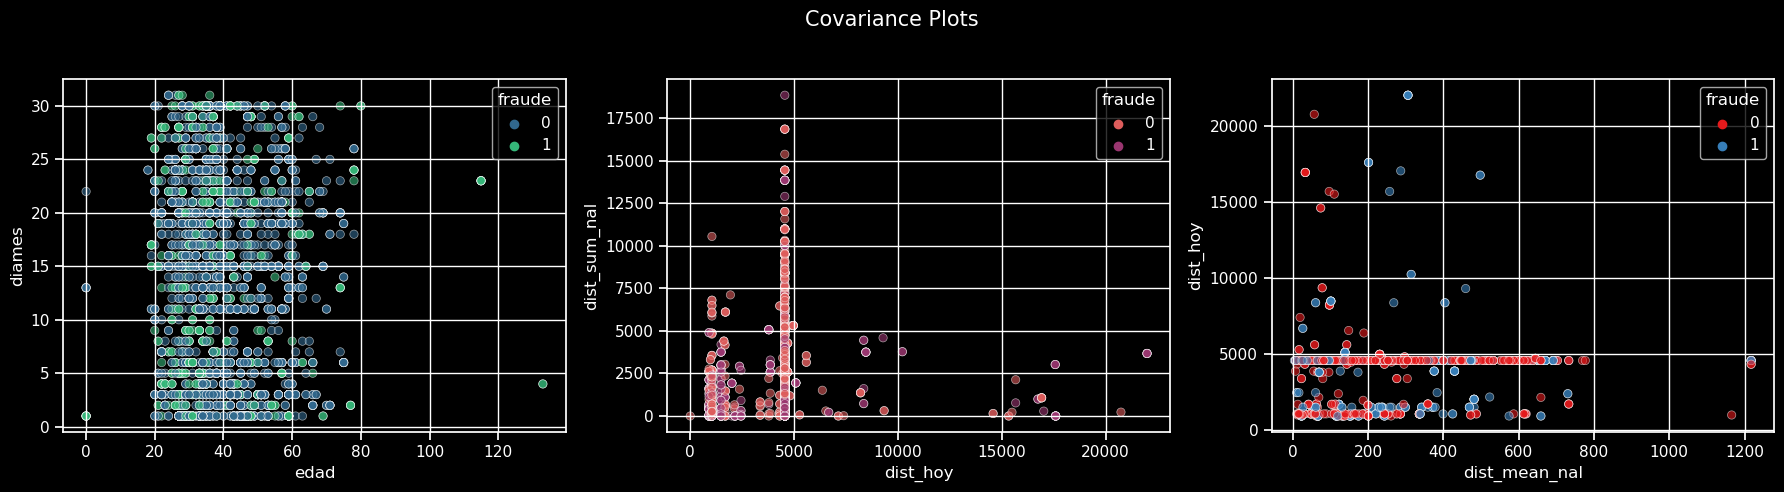

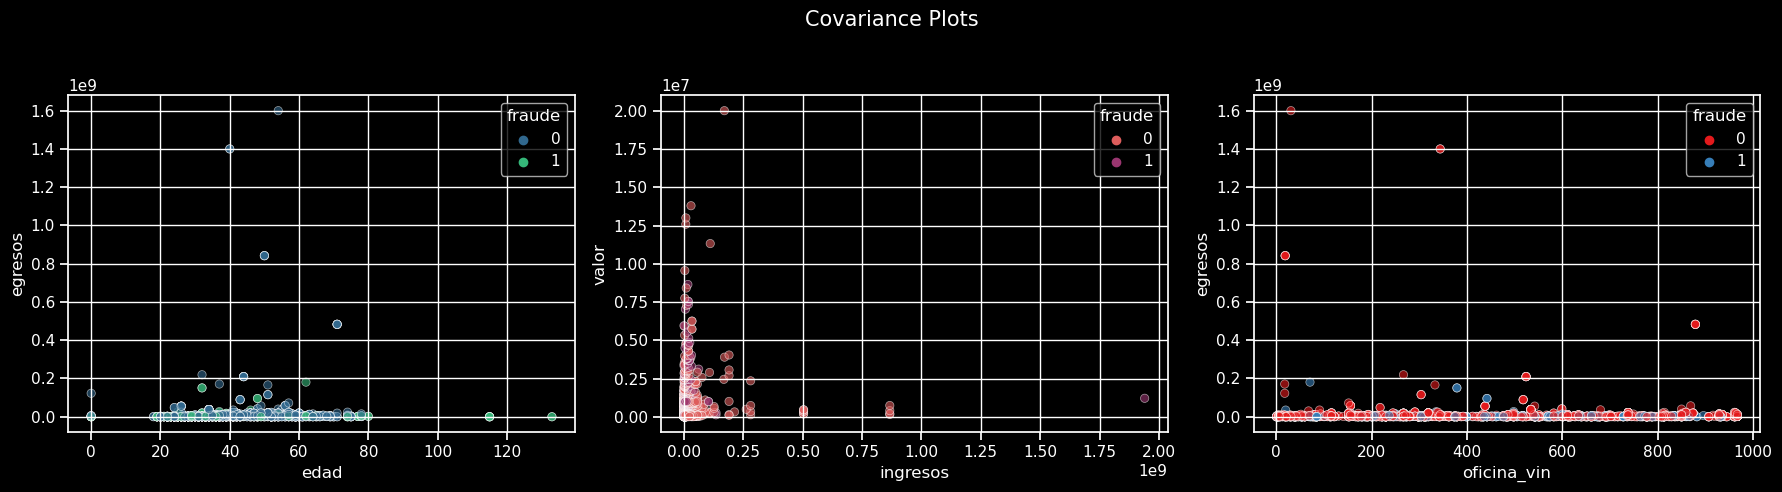

In [16]:
# Función para graficar la covarianzas entre los predictores
def plotting_covariance(X:pd.DataFrame, y:pd.Series, continuous:list, n_iter:int) -> any:
  
    """
    Function to plot covariance matrix choosing some random predictors

    Args:
        X: DataFrame
        y: Series
        continuous: list
        n_iter: int
    
    Return:
        DataViz
    """
    
    # Semilla para efectos de reproducibilidad
    np.random.seed(n_iter)
  
    for _ in range(n_iter):
        # Creamos una figura con tres subfiguras
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
        plt.suptitle('Covariance Plots\n', fontsize=15)

        # Seleccionamos dos variables aleatorias del Dataframe
        var1 = np.random.choice(X[continuous].columns)
        var2 = np.random.choice(X[continuous].columns)
        while var1 == var2:
            var2 = np.random.choice(X[continuous].columns)

        # Graficamos la covarianza en la primera subfigura
        sns.scatterplot(x=var1, y=var2, data=X[continuous], ax=ax1, hue=y, palette='viridis', alpha=0.6)
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.xticks()
        plt.yticks()
        ax1.grid()

        # Seleccionamos dos nuevas variables aleatorias del Dataframe
        var1 = np.random.choice(X[continuous].columns)
        var2 = np.random.choice(X[continuous].columns)
        while var1 == var2:
            var2 = np.random.choice(X[continuous].columns)

        # Graficamos la covarianza en la segunda subfigura
        sns.scatterplot(x=var1, y=var2, data=X[continuous], ax=ax2, hue=y, palette='flare', alpha=0.6)
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.xticks()
        plt.yticks()
        ax2.grid()
        
        # Seleccionamos otras dos variables aleatorias del Dataframe
        var1 = np.random.choice(X[continuous].columns)
        var2 = np.random.choice(X[continuous].columns)
        while var1 == var2:
            var2 = np.random.choice(X[continuous].columns)

        # Graficamos la covarianza en la tercera subfigura
        sns.scatterplot(x=var1, y=var2, data=X[continuous], ax=ax3, hue=y, palette='Set1', alpha=0.6)
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.xticks()
        plt.yticks()
        ax3.grid()
        
        # Mostramos la figura
        fig.tight_layout()
            

# Graficando las covarianzas
plotting_covariance(X=data, y=data['fraude'], continuous=continuous, n_iter=3)

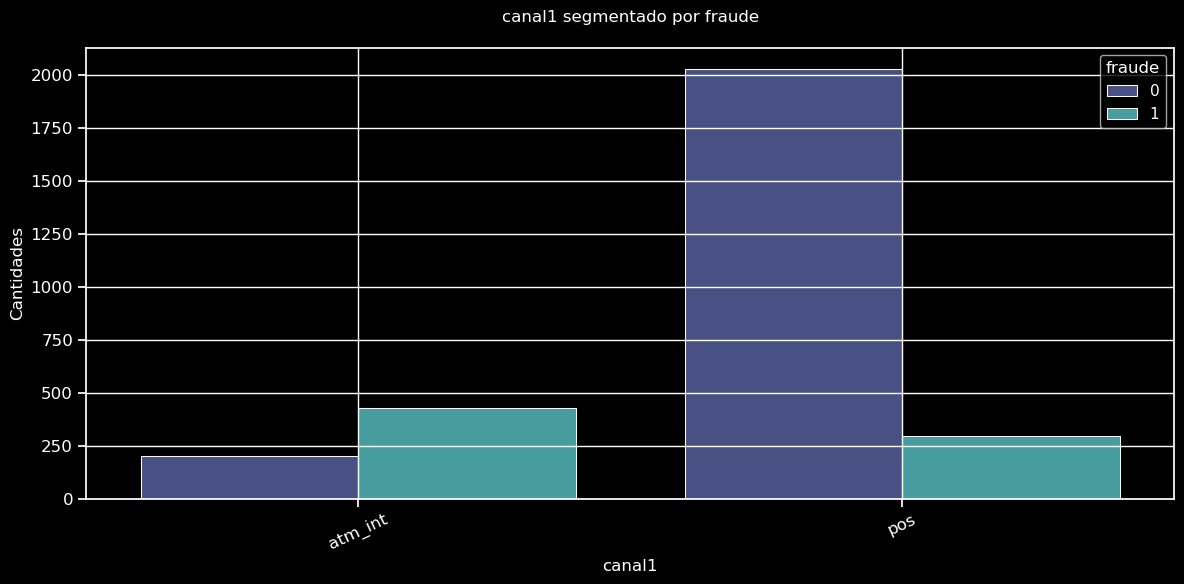

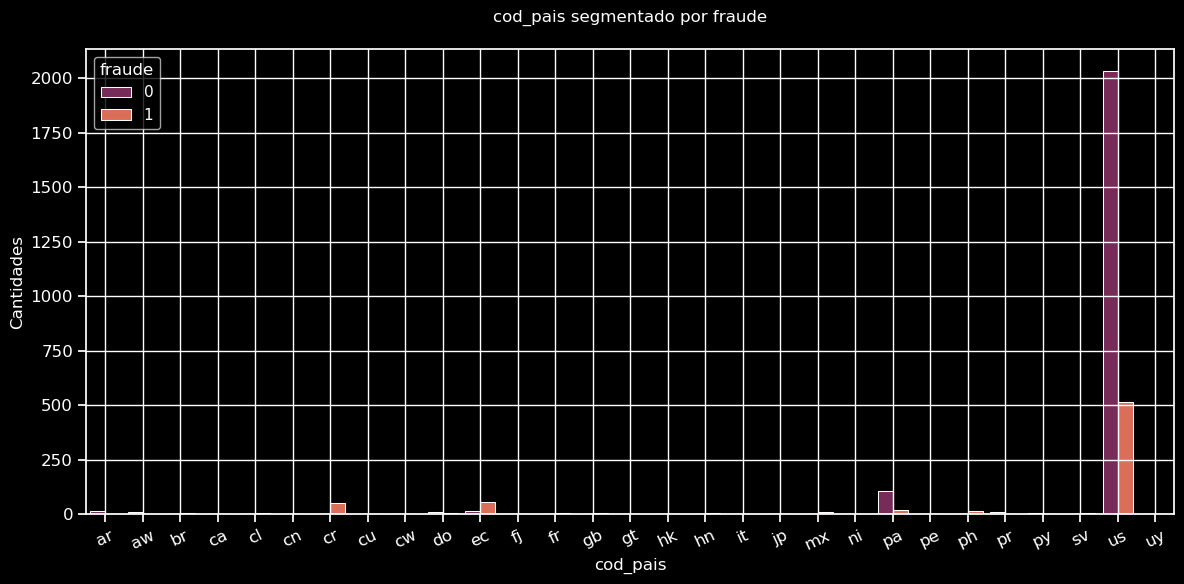

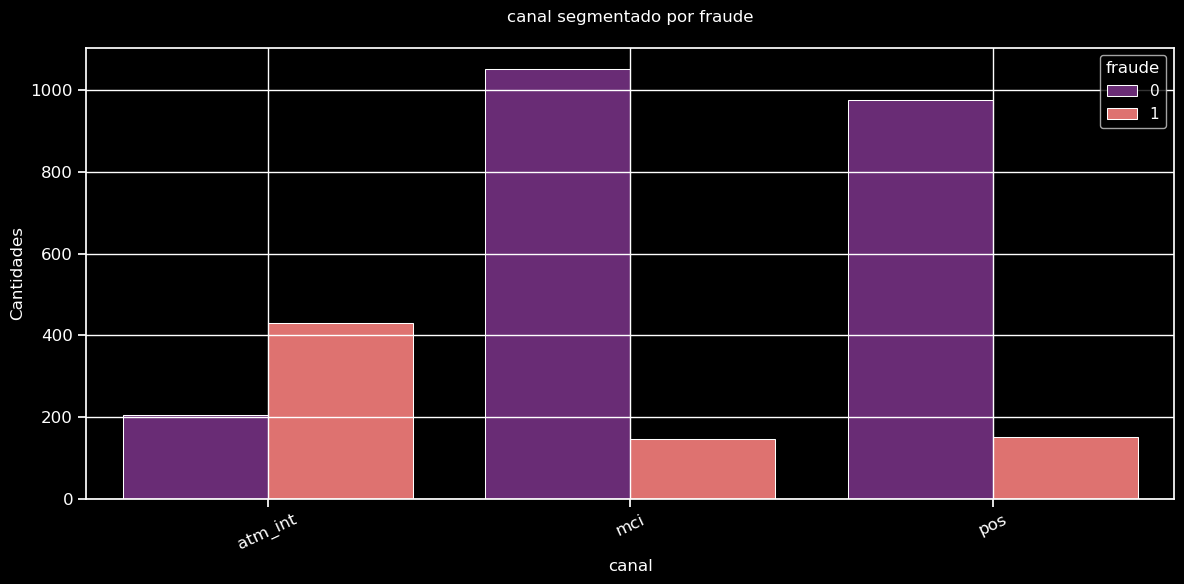

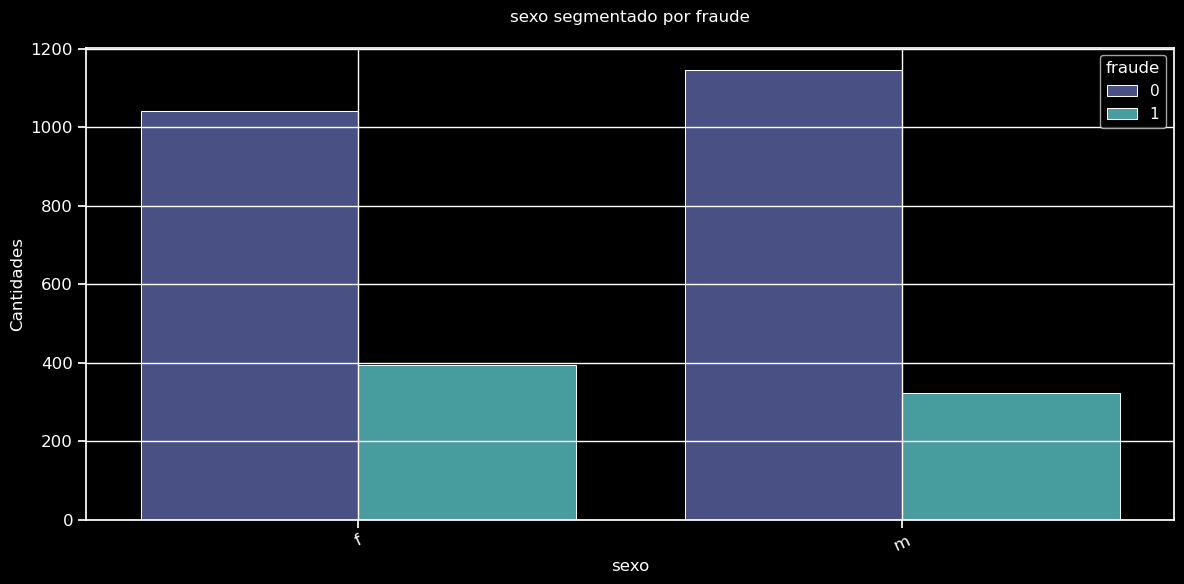

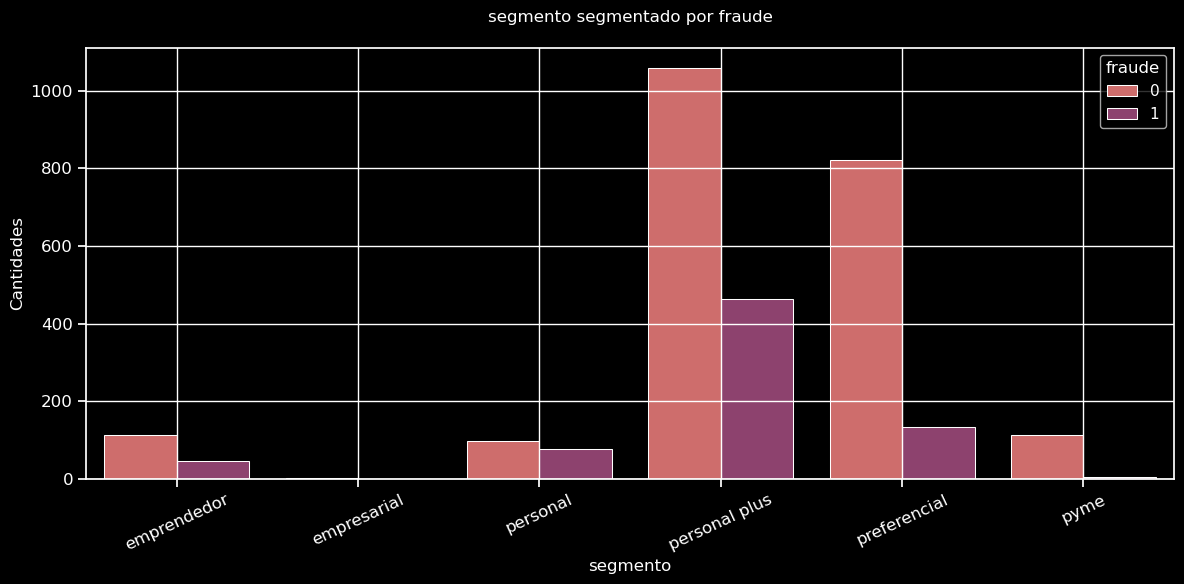

In [17]:
# Graficos de cómo covarian algunas variables con respecto al target
paletas = ['rocket', 'mako', 'crest', 'magma', 'viridis', 'flare']
np.random.seed(11)

for var in data[categoricals]:
    plt.figure(figsize=(12, 6))
    plt.title(f'{var} segmentado por fraude\n', fontsize=12)
    sns.countplot(x=var, hue='fraude', data=data, edgecolor='white', lw=0.75, palette=np.random.choice(paletas))
    plt.ylabel('Cantidades')
    plt.xticks(fontsize=12, rotation=25)
    plt.yticks(fontsize=12)
    plt.grid()
    plt.tight_layout()

---
---